In [112]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [137]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [75]:
df = pd.read_csv('datafolder//final.csv')
df.describe()

,prices,prices_t1,prices_t2,sales,sales_t1,sales_t2,weather,weather_t1,weather_t2,gdp,...,mom3_t2,mom4,mom4_t1,mom4_t2,population,longitude,latitude,month,year,y
count,13728.000000,13728.000000,13728.000000,1.372800e+04,1.372800e+04,1.372800e+04,13728.000000,13728.000000,13728.000000,1.372800e+04,...,13728.000000,13728.000000,13728.000000,13728.000000,1.372800e+04,13728.000000,13728.000000,13728.000000,13728.000000,13728.000000
mean,9.235244,9.219559,9.202248,2.089440e+06,2.085484e+06,2.085301e+06,52.676552,52.694143,52.678030,2.244319e+05,...,13.789496,116.435976,115.406537,114.994464,6.726206e+06,-91.112058,39.402989,6.534965,2001.580420,9.250209
std,2.788142,2.782238,2.777662,2.095183e+06,2.092103e+06,2.091809e+06,17.327157,17.306984,17.322294,2.846136e+05,...,9.319222,93.919909,93.407125,93.599451,7.335017e+06,14.785496,4.619242,3.438468,6.879237,2.793090
min,4.180000,4.180000,4.180000,1.050110e+05,1.050110e+05,1.050110e+05,-2.500000,-2.500000,-2.500000,1.150900e+04,...,-0.143818,13.382967,13.382967,12.636618,5.793150e+05,-122.070938,27.766279,1.000000,1990.000000,4.180000
25%,7.230000,7.220000,7.210000,6.137960e+05,6.110992e+05,6.110020e+05,39.500000,39.500000,39.500000,5.637800e+04,...,8.145849,57.417351,57.298409,57.027966,2.046072e+06,-99.525124,35.718400,4.000000,1996.000000,7.240000
50%,8.550000,8.540000,8.520000,1.545816e+06,1.541950e+06,1.541950e+06,53.800000,53.800000,53.800000,1.321670e+05,...,10.768921,77.156412,77.049940,76.321492,4.779540e+06,-89.301322,39.999729,7.000000,2002.000000,8.560000
75%,10.810000,10.790000,10.770000,2.778356e+06,2.771852e+06,2.771852e+06,67.000000,67.000000,67.000000,2.699370e+05,...,17.376736,143.166312,142.058979,142.058979,7.671812e+06,-79.397306,42.898629,10.000000,2008.000000,10.830000
max,22.010000,22.010000,22.010000,1.862066e+07,1.862066e+07,1.862066e+07,89.200000,89.200000,89.200000,2.223892e+06,...,51.373037,565.598675,565.598675,565.598675,3.953665e+07,-69.381927,47.528912,12.000000,2013.000000,22.010000


# Plotting prices

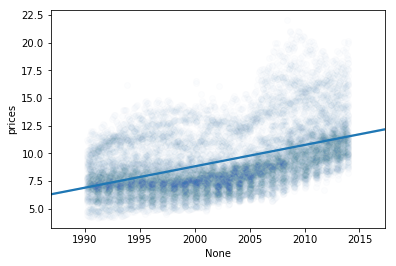

In [127]:
x = df['year'] + (df['month']/12)
sns.regplot(x, df['prices'], scatter_kws= {'alpha': 0.01})

# Data cleaning

In [129]:
sc = StandardScaler()
X = sc.fit_transform(X = df.drop('y', axis=1))
y = sc.fit_transform(X = df['y'].values.reshape(-1,1))

# Principal Component analysis

In [7]:
pca = PCA(n_components=4)

In [59]:
X_new = pca.fit_transform(X)

In [63]:
df_new = pd.DataFrame(X_new,columns=['Eigen1', 'Eigen2', 'Eigen3', 'Eigen4'])

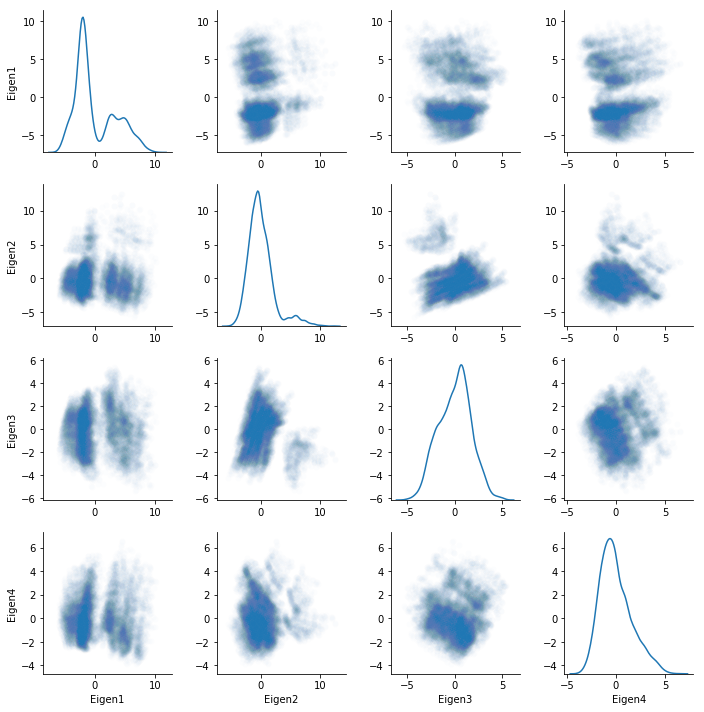

In [93]:
sns.pairplot(df_new, plot_kws= {'alpha': 0.01}, diag_kind='kde')

# Splitting data

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [165]:
def mse(y, y_hat):
    
    n = len(y)
    return 1/n * (y - y_hat)**2

# Linear regression

In [145]:
linreg = LinearRegression()

In [146]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
linreg_pred = linreg.predict(X_test)

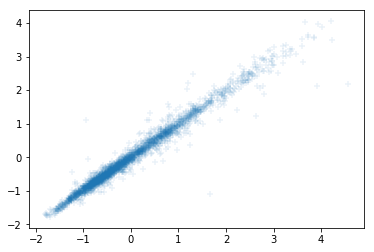

In [162]:
plt.scatter(y_test, linreg_pred, alpha=0.09, marker='+')

In [166]:
mse(linreg_pred, y_test)

array([[  1.33677746e-06],
       [  1.08785932e-09],
       [  1.66588388e-07],
       ..., 
       [  1.66413902e-05],
       [  6.79027677e-06],
       [  3.15449334e-06]])

# Random Forrest

In [124]:
forest = RandomForestRegressor()

In [149]:
forest.fit(X_train,y_train)

/Users/Jeppe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [150]:
forest_pred = forest.predict(X_test)

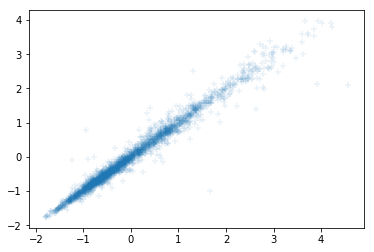

In [158]:
plt.scatter(y_test, forest_pred, alpha=0.09, marker='+')

In [160]:
mse_forest = forest.score(X_test, y_test)

# Support Vector Machine

In [138]:
svr = SVR()

In [152]:
svr.fit(X_train,y_train)

/Users/Jeppe/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [153]:
svr_pred = svr.predict(X_test)

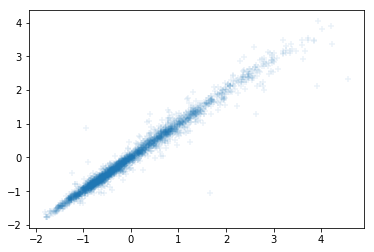

In [154]:
plt.scatter(y_test, svr_pred, alpha=0.09, marker='+')

In [156]:
svr = mse = svr.score(X_test, y_test)

0.97582060564107054

In [161]:
mse_forest

0.97240023181920088